In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("penguins_size.csv")

In [4]:
data.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [5]:
data["species"].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [6]:
data["island"].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [7]:
data["sex"].value_counts()
#romve (.           1)
#it is one missing value

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [8]:
# Remove the row with the missing value ('.')
data = data[data['sex'] != '.']
data["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            343 non-null    object 
 1   island             343 non-null    object 
 2   culmen_length_mm   341 non-null    float64
 3   culmen_depth_mm    341 non-null    float64
 4   flipper_length_mm  341 non-null    float64
 5   body_mass_g        341 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [10]:

##### culmen_length_mm   341 non-null    >>  we have 2 null
##### culmen_depth_mm    341 non-null    >>  we have 2 null
##### flipper_length_mm  341 non-null    >>  we have 2 null
##### body_mass_g        341 non-null    >>  we have 2 null
##### sex                333 non-null    >>  we have 10 null
##### Index: 343 entries, 0 to 343
##### Data columns (total 7 columns)

<Axes: >

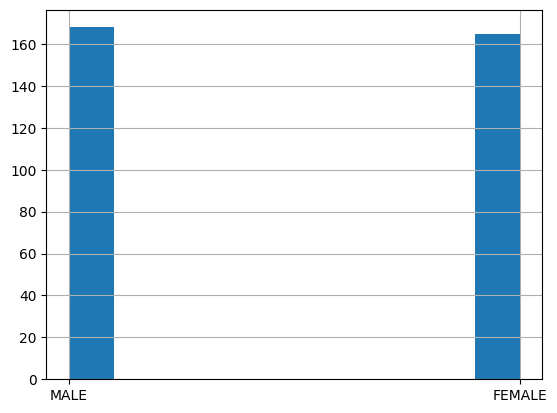

In [17]:
"""how can deal with null 
   1-use histgram to show the destribution 
   """
data['sex'].hist()# in this plot i drop nall

In [18]:
data = data.dropna(subset=['sex'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [20]:
data = data.reset_index(drop=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


In [25]:
correlation_matrix = data.corr(numeric_only= True)
correlation_matrix

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228626,0.653096,0.589451
culmen_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


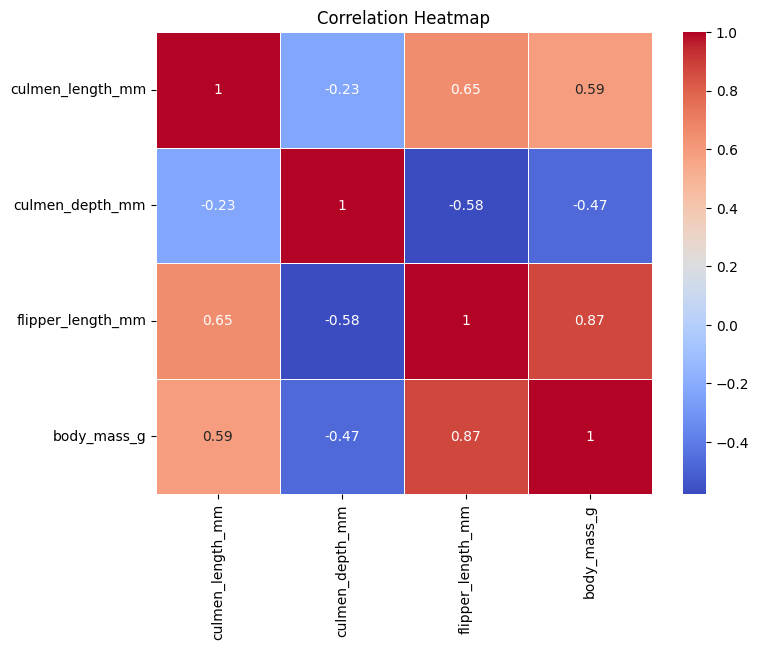

In [24]:
import seaborn as sns
# i need know the relation betwen data
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [27]:
#the strong liner corelation 
# corr (flipper_length_mm , body_mass_g) >> cor = 87%
# corr (flipper_length_mm , culmen_length_mm) >> cor = 65%
# corr (culmen_length_mm , body_mass_g) >> cor = 59%
#################################(- corr)
# corr (culmen_depth_mm , flipper_length_mm) >> cor = -58%
#the weeke liner corelation 
# corr (culmen_depth_mm , culmen_length_mm) >> cor = -23% >> my be non liner


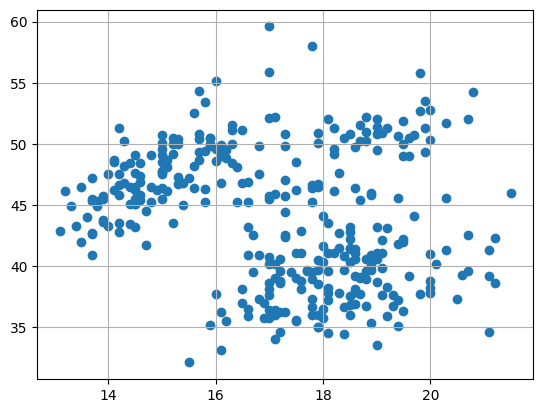

In [34]:
plt.scatter(data["culmen_depth_mm"], data['culmen_length_mm'])
plt.grid()
# no liner or no liner cororation 
# but we can divde data to class


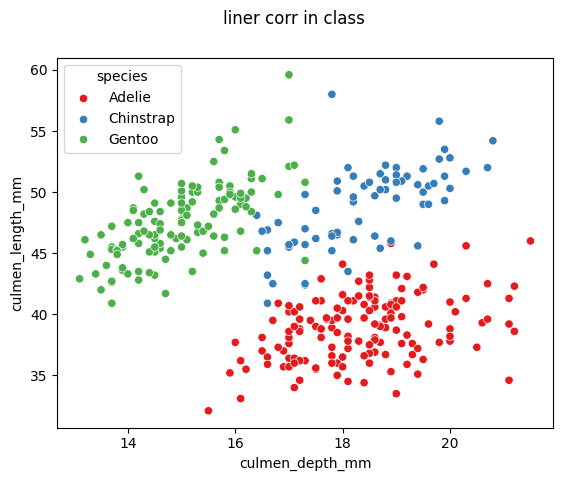

In [40]:
# liner corr in class 
sns.scatterplot(data=data, x='culmen_depth_mm', y='culmen_length_mm', hue='species', palette='Set1')
plt.suptitle('liner corr in class ')
plt.show()

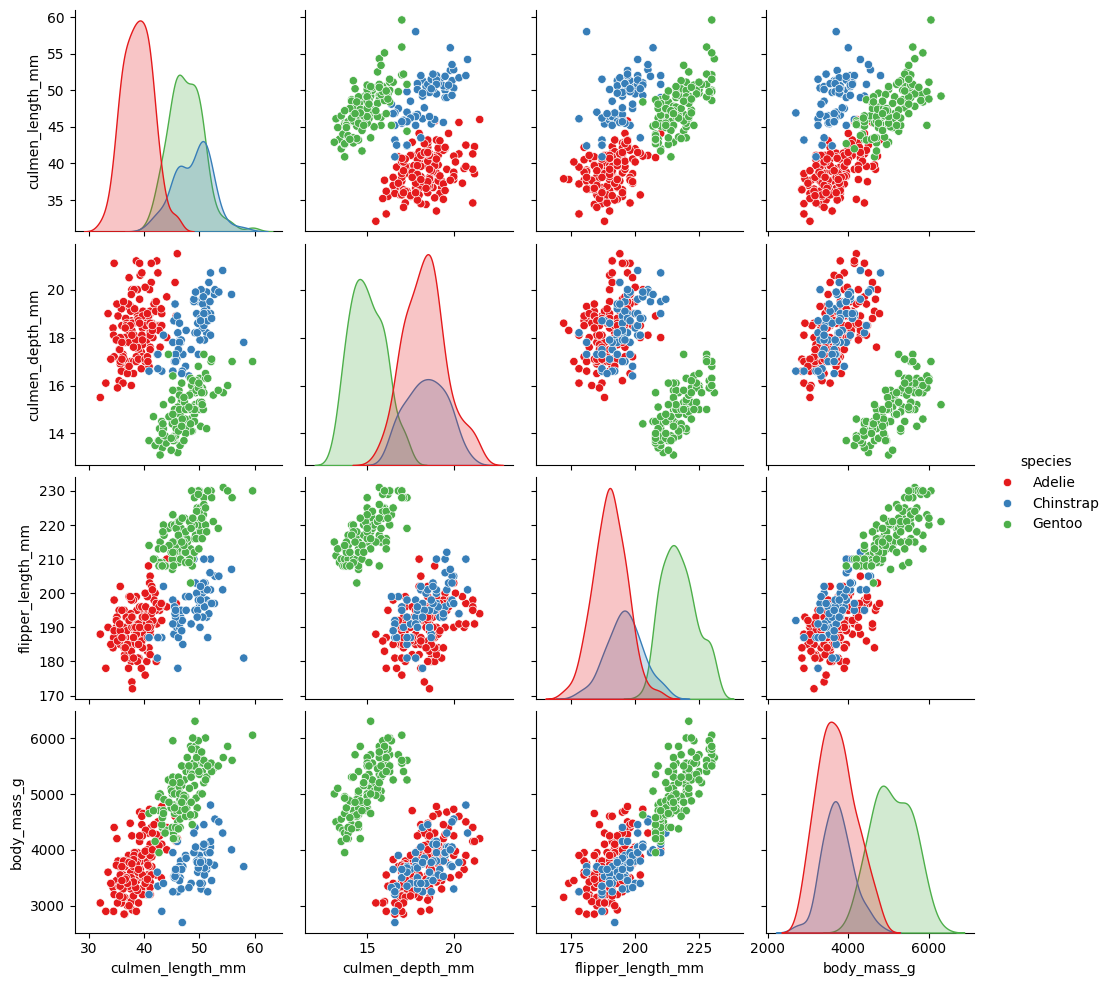

In [ ]:
# what is the pest corr for evry claas
sns.pairplot(data, hue='species', palette='Set1')

In [42]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_29040\3076574171.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='species', y='culmen_length_mm', palette='Set1')


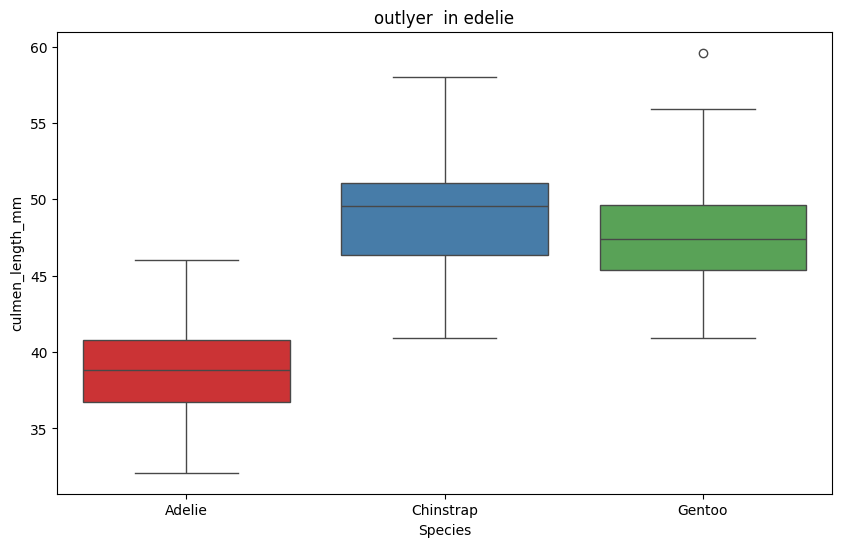

In [50]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='species', y='culmen_length_mm', palette='Set1')
plt.title('outlyer  in gentoo')
plt.xlabel('Species')
plt.ylabel('culmen_length_mm')
plt.show()

C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_29040\633419563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='species', y='culmen_depth_mm', palette='Set1')


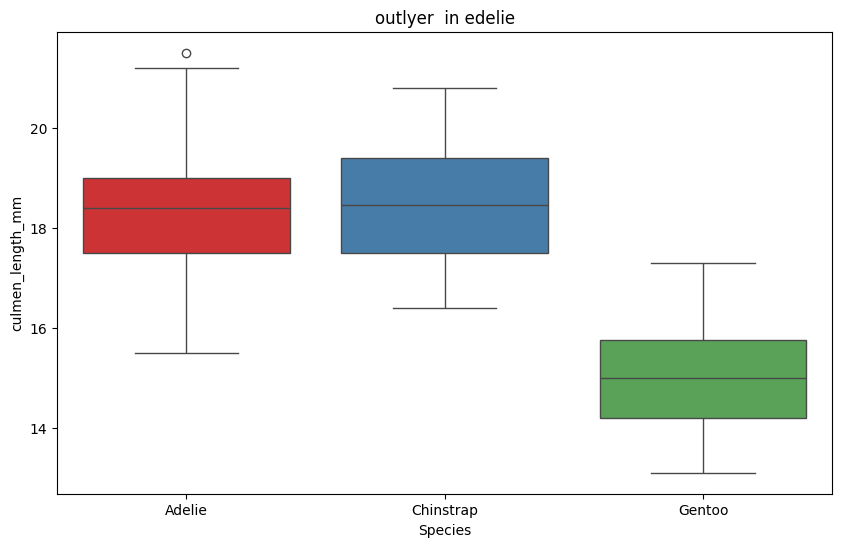

In [48]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='species', y='culmen_depth_mm', palette='Set1')
plt.title('outlyer  in edelie')
plt.xlabel('Species')
plt.ylabel('culmen_length_mm')
plt.show()

C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_29040\3805357731.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='species', y='flipper_length_mm', palette='Set1')


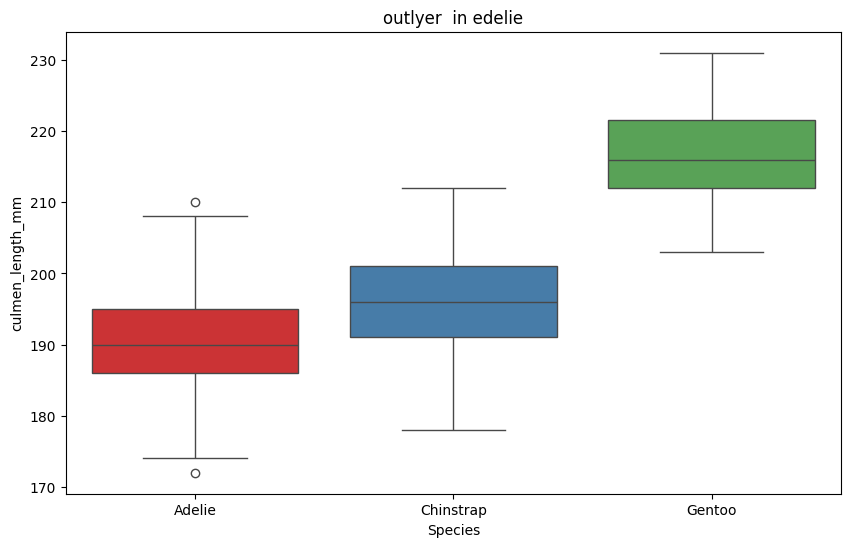

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='species', y='flipper_length_mm', palette='Set1')
plt.title('outlyer  in edelie')
plt.xlabel('Species')
plt.ylabel('culmen_length_mm')
plt.show()

C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_29040\1448316698.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='species', y='body_mass_g', palette='Set1')


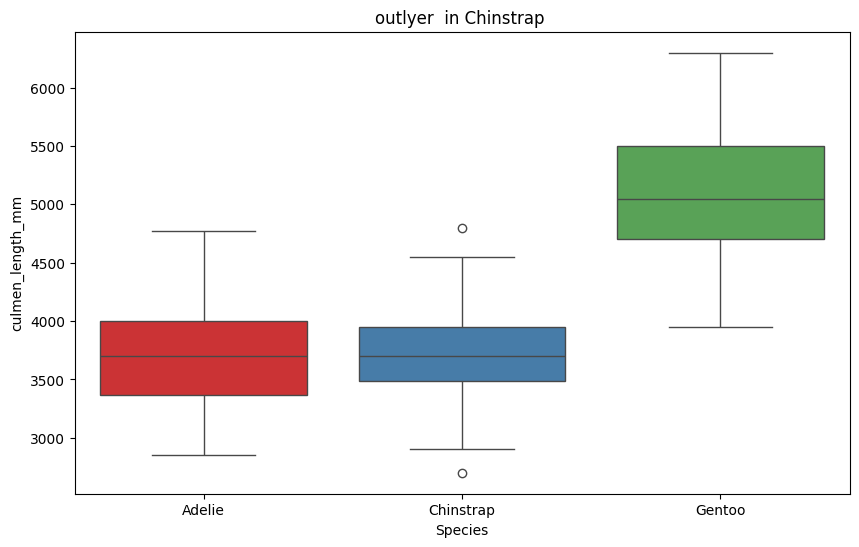

In [54]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='species', y='body_mass_g', palette='Set1')
plt.title('outlyer  in Chinstrap ')
plt.xlabel('Species')
plt.ylabel('culmen_length_mm')
plt.show()

In [ ]:
"""conclotion  ther is outlyer"""
#romove outlyer 
#class gentoo esy to classfay
#the best colum to classfy (Chinstrap,edelie) is culmen_length_mm
